# 201902 Fordgobike Trip Data Exploration
## by Ashraf Samir Ali

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(fordgobike.shape)
print(fordgobike.dtypes)
print(fordgobike.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
# observing how many columns with missing or null values. 
print(fordgobike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# descriptive statistics for numeric variables
print(fordgobike.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

In [6]:
# check for duplicated rows
fordgobike.duplicated().sum()

0

### Issues That Found 
<ol>
    <li>Start_time, end_time, start_station_id, end_station_id, member_birth_year, incorrect datatypes.</li>
    <li>No need for ".0" in start/end_station_id after correcting the datatypes.</li>
    <li>We could convert start_station_name, end_station_name, user_type, member_gender to category datatype.</li>
    <li>six columns with null values.</li>
</ol>

### Cleaning

#### 1. Drop NaN rows

In [7]:
# columns with null values 
fordgobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
# drop null values
fordgobike.dropna(inplace=True)

In [9]:
# Test 
fordgobike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### 2. Change data type

In [10]:
# Change the above to string and datetime datatypes
fordgobike['start_time'] = pd.to_datetime(fordgobike['start_time'])
fordgobike['end_time'] = pd.to_datetime(fordgobike['end_time'])
fordgobike['start_station_id'] = fordgobike['start_station_id'].astype(str)
fordgobike['end_station_id'] = fordgobike['end_station_id'].astype(str)
fordgobike['member_birth_year'] = fordgobike['member_birth_year'].astype(str)
fordgobike['start_station_id'] = fordgobike['start_station_id'].apply(lambda x : x.split('.')[0])
fordgobike['end_station_id'] = fordgobike['end_station_id'].apply(lambda x : x.split('.')[0])
fordgobike['member_birth_year'] = fordgobike['member_birth_year'].apply(lambda x : x.split('.')[0])
fordgobike['member_birth_year'] = fordgobike['member_birth_year'].astype(int)


In [11]:
# Change to categorey data type
fordgobike.member_gender = pd.Categorical(np.array(fordgobike.member_gender), categories=['Male', 'Female', 'Other'], ordered=True)
fordgobike.start_station_name = pd.Categorical(np.array(fordgobike.start_station_name), categories=fordgobike.start_station_name.unique(), ordered=False)   
fordgobike.end_station_name = pd.Categorical(np.array(fordgobike.end_station_name), categories=fordgobike.end_station_name.unique(), ordered=False)
fordgobike.user_type = pd.Categorical(np.array(fordgobike.user_type), categories=fordgobike.user_type.unique(), ordered=False)

#### 3. Test

In [12]:
# testing dataframe no strange values
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [13]:
# testing null values and datatypes
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  category      
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  category      
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### What is the structure of your dataset?
There are 174,952 rides in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude,(same for end station), bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip ). Most variables are numeric in nature, but the variables member_gender(ordered factor), start_station_name, user_type and end_station_name are categorical. ordered factor variables with the following levels.

(worst) ——> (best)<br>
member_gender: Male, Female, Other 


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features of individuals that makes more rides, what is the most time rides takes place in and how long rides takes in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 duration_sec <br>
 start_station_id <br>
 start_station_name <br>
 end_station_id <br>
 end_station_name <br>
 bike_id <br>
 user_type <br>
 member_birth_year <br>
 member_gender  <br>

## Univariate Exploration


I'll start by looking at the distribution of the duration_sec.

In [14]:
fordgobike['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

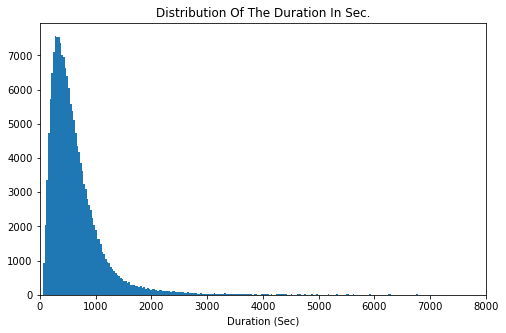

In [15]:
# start with a standard-scaled plot
binsize = 30
bins = np.arange(0, fordgobike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = fordgobike, x = 'duration_sec', bins = bins)
plt.xlim([0,8000])
plt.xlabel('Duration (Sec)')
plt.title('Distribution Of The Duration In Sec.')

plt.show()

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

We can see a right-skewed graph, we had also an outliers(84548) thats why we limited the x-axis. Most rides durations falls between 100 to 750. 

In [16]:
# log form of duration_sec
np.log10(fordgobike.duration_sec).describe()

count    174952.000000
mean          2.707824
std           0.305190
min           1.785330
25%           2.509203
50%           2.707570
75%           2.897077
max           4.927103
Name: duration_sec, dtype: float64

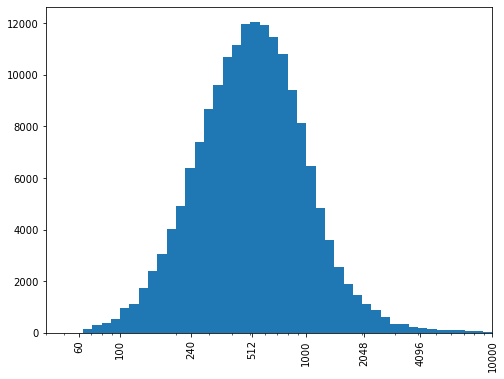

In [17]:
# Log scale distribution of duration_sec
bins = 10**np.arange(1.8, np.log(fordgobike.duration_sec).max()+0.05, 0.05)
plt.figure(figsize = (8,6))
plt.hist(data = fordgobike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlim(40, 8000)
locations = [60, 100, 240, 512, 1000, 2048, 4096, 10000]
plt.xticks(locations, locations, rotation = 90);

We can see this is a unimodal distribution with most frequent for duration between 240 and 1000 seconds after log scale.

In [18]:
fordgobike['start_station_name'].describe()

count                   174952
unique                     329
top       Market St at 10th St
freq                      3649
Name: start_station_name, dtype: object

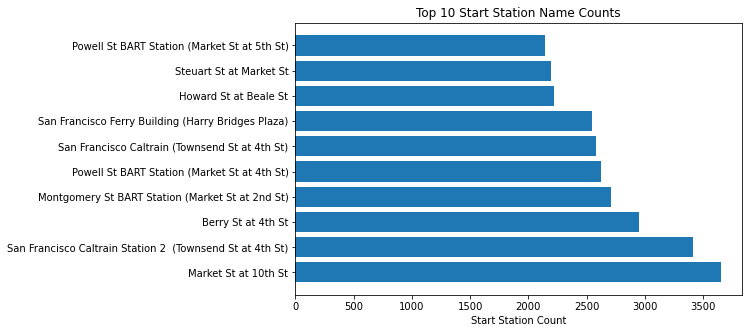

In [19]:
# plotting start_station_name on a standard scale
new_df = fordgobike['start_station_name'].value_counts()
plt.figure(figsize=[8, 5])
plt.barh(new_df.head(10).index, new_df.head(10).values)
plt.xlabel('Start Station Count')
plt.title('Top 10 Start Station Name Counts')

#for i in range (10):
#    count = new_df[i]
#    pct_string = '{:0.1f}%'.format(100*count/new_df.head(10).sum())
#    plt.text(count+1, i, pct_string, va='center')
    
plt.show()

Market St at 10th St is the most frequent start station name.

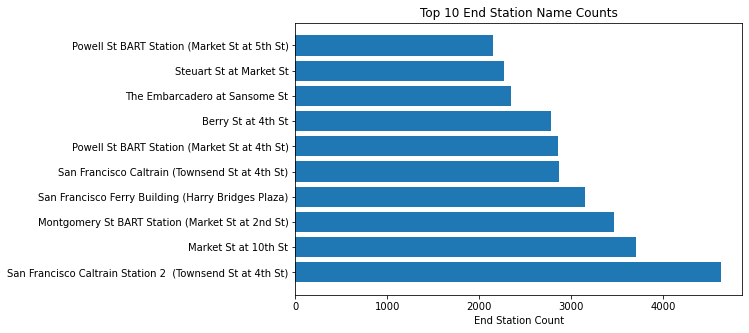

In [20]:
# plotting end_station_name on a standard scale
new_df = fordgobike['end_station_name'].value_counts()
plt.figure(figsize=[8, 5])
plt.barh(new_df.head(10).index, new_df.head(10).values)
plt.xlabel('End Station Count')
plt.title('Top 10 End Station Name Counts')
plt.show()

San Francisco Caltrain Station 2 (Townsend St at 4th St) is the most frequent end station name.

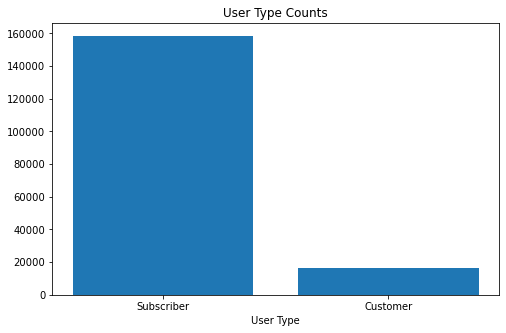

In [21]:
# plotting user_type on a standard scale
new_df = fordgobike['user_type'].value_counts()
plt.figure(figsize=[8, 5])
plt.bar(x = new_df.index, height=new_df.values)
plt.xlabel('User Type')
plt.title('User Type Counts')
#labels = ['{}'.format(v) for v in new_df.head(10).index ]
#plt.xticks(new_df.head(10).index, labels)
plt.show()


Subscribers has much higher rides than customers.

In [22]:
fordgobike['member_birth_year'].describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

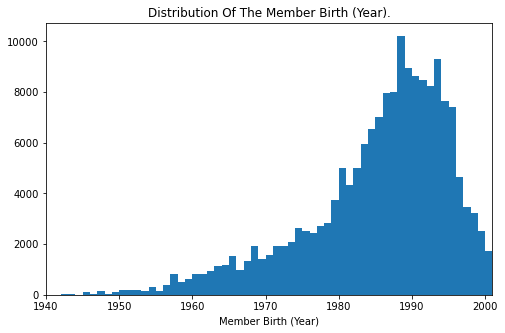

In [23]:
# a standard-scaled plot
binsize = 1
bins = np.arange(0, fordgobike['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = fordgobike, x = 'member_birth_year', bins = bins)
plt.xlim([1940,2001])
plt.xlabel('Member Birth (Year)')
plt.title('Distribution Of The Member Birth (Year).')

plt.show()

We had many outliers so we cut them and started from 1940 to 2000, Most of the member birth year falls between 1980 to 2000, with left skewed distribution.

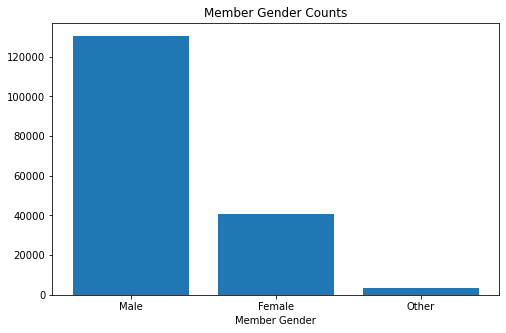

In [24]:
# plotting member_gender on a standard scale
new_df = fordgobike['member_gender'].value_counts()
plt.figure(figsize=[8, 5])
plt.bar(x = new_df.index, height=new_df.values)
plt.xlabel('Member Gender')
plt.title('Member Gender Counts')
plt.show()


Males has much higher rides than Females.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The exploration of duration_sec was distributed with extreme outliers. that's why we saw a highly right skewed positive graph. After the log_scale tranformation. It was clearly a unimodal distribution with most frequent duration between 240 and 1000.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The exploration of member_birth_year variable we figured there was many outliers out there and the oldest member_birth_year is 1878. That's why i limited the x-axis to have just from 1940 to 2001, and it was acceptable after removing years before 1940.

## Bivariate Exploration


To start off with, I want to look at the pairwise correlations present between features in the data

In [25]:
# creat day and hour of start time columns
fordgobike['day'] = fordgobike.start_time.dt.strftime("%A")
fordgobike['hour'] = fordgobike.start_time.dt.hour

# convert day to ordered categorey 
fordgobike.day = pd.Categorical(np.array(fordgobike.day), categories=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'], ordered=True)

fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thursday,23


In [26]:
np.percentile(fordgobike.duration_sec, 1), np.percentile(fordgobike.duration_sec, 99)

(104.0, 3176.0)

In [27]:
# create subsets variables
numeric_vars = ['duration_sec', 'member_birth_year','hour']
categoric_vars = ['member_gender', 'user_type' ]
time_vars = fordgobike[['day', 'hour','duration_sec']].query('duration_sec >= 104 & duration_sec <= 3176')

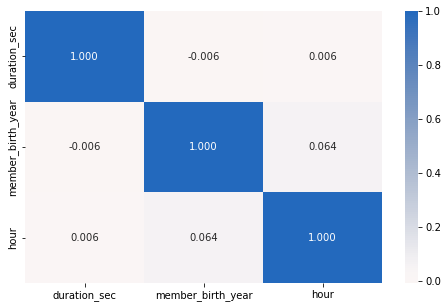

In [28]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(fordgobike[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

The correlation between variables, as it is very low we need further exploration.<br>
Notice there is negative correlation.

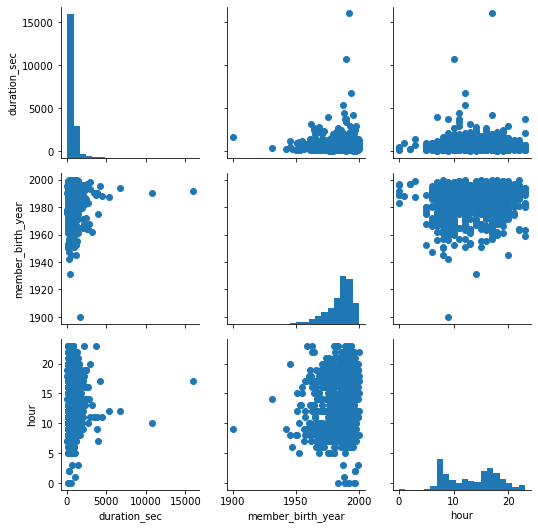

In [29]:
# plot matrix for numeric_vars
samples = np.random.choice(fordgobike.shape[0], 1000, replace = False)
fordgobike_samp = fordgobike.iloc[samples,:]

g = sb.PairGrid(data = fordgobike_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

We suggest further exploration, because we can't see any correlation from the scatter plots.

<Figure size 720x720 with 0 Axes>

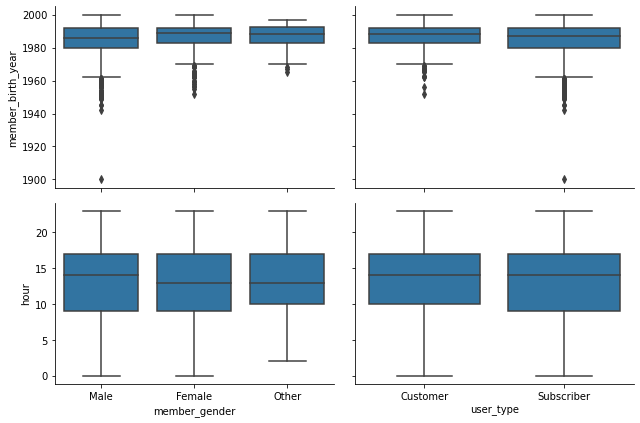

In [30]:
# plot matrix of numeric features against categorical features.

samples = np.random.choice(fordgobike.shape[0], 2000, replace = False)
fordgobike_samp = fordgobike.iloc[samples,:]

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x =x, y =y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = fordgobike_samp, y_vars = ['member_birth_year','hour'], x_vars = categoric_vars,
                height = 3, aspect = 1.5);
g.map(boxgrid);
plt.show();

Males starts rides slightly later than females, also customer starts slightly later than subscribers and is interesting as i expected to be the otherwise case.<br>
Most of the males are older than females as will as subscribers.

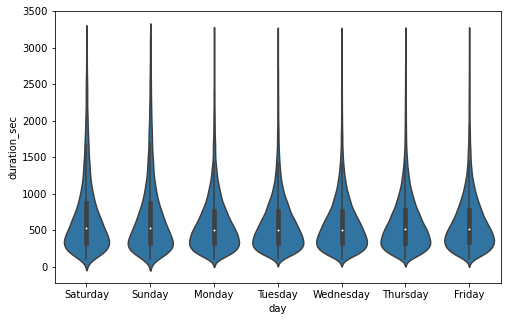

In [31]:
# violinplot for duration_sec vs week_day
plt.figure(figsize = (8,5))
base_color = sb.color_palette()[0]
sb.violinplot(data = time_vars, x = 'day', y = 'duration_sec', color = base_color);

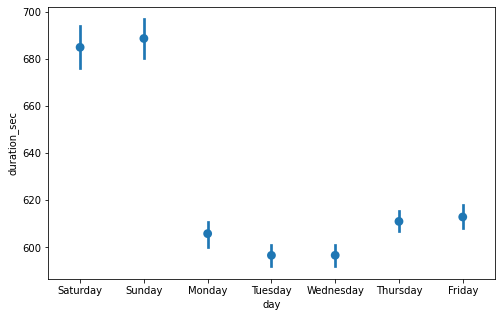

In [32]:
# pointplot for duration_sec vs weekday
plt.figure(figsize = (8,5))
base_color = sb.color_palette()[0]
sb.pointplot(data = time_vars, x = 'day', y = 'duration_sec', color = base_color, linestyles = '');

from last two plots shows an interesting observation. Most bikes may have been rented on weekdays for same duration but people have liked to rent bikes on saturday and sunday for a longer duration.

In [33]:
np.log10(fordgobike.duration_sec.describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

In [34]:
# histogram function for duration_sec values in x-axis
def hist_plt(x, **kwargs):
    bin_edges = 10**np.arange(1.8, np.log(fordgobike.duration_sec.max())+0.05, 0.05)
    locations = [60, 2**7, 2**8, 2**9, 1000, 2**11, 2**12, 3176]
    plt.hist(x,  bins = bin_edges)
    plt.xscale('log')
    plt.xlim(60, 3176)
    plt.xticks(locations, locations, rotation=45)

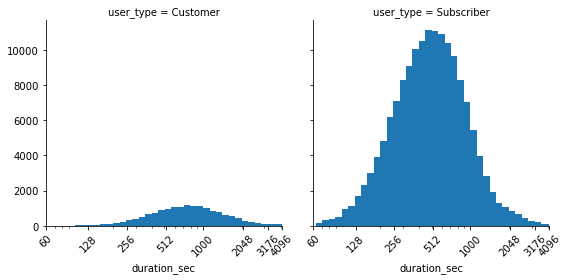

In [35]:
# FacetGrid for user_type using hist_plt function
g = sb.FacetGrid(data = fordgobike, col = 'user_type', height = 4)
g = g.map(hist_plt, 'duration_sec')

Subscribers rents more bikes than customers about 10000 for 512 duration.

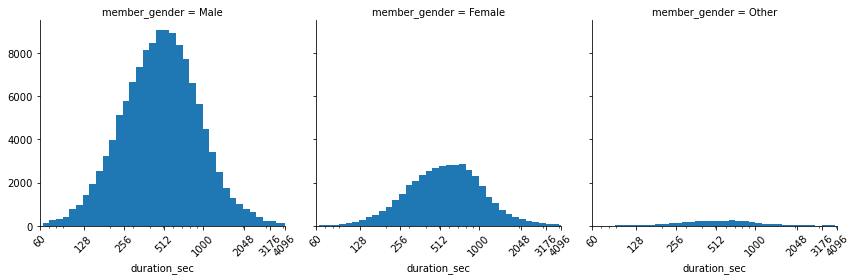

In [36]:
# FacetGrid for member_gender using hist_plt function
g = sb.FacetGrid(data = fordgobike, col = 'member_gender', height = 4)
g = g.map(hist_plt, 'duration_sec')

Males likes to ride more bikes than females over 8000 bike for 512 duration.

In [37]:
# countplot function
def count_plt(c, z, axd):
    sb.countplot(data = fordgobike, x = c, hue = z, ax = axd)
    plt.sca(axd)
    plt.xticks(rotation = 45)

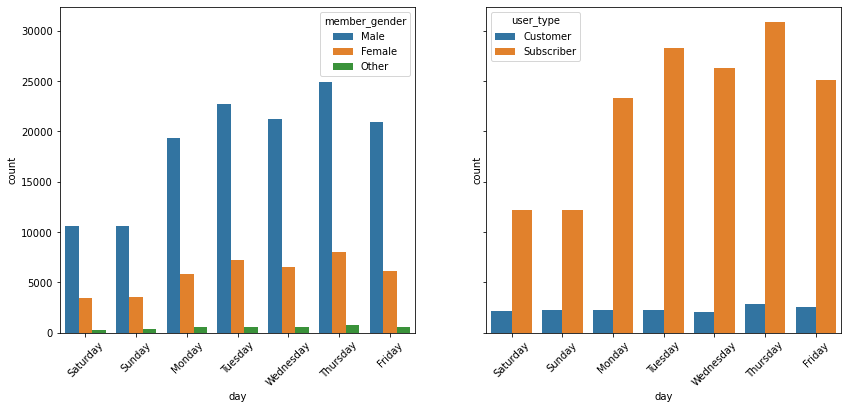

In [38]:
# count plot for member_gender and user_type in week days
figure, axis = plt.subplots(ncols = 2, sharey = True, figsize = (14, 6))
count_plt('day', 'member_gender', axis[0])
count_plt('day', 'user_type', axis[1])


Thursday is the higher number of rented bikes for males as also for females, while the least day was sunday for both males and femalesm with males is the highest number of renting bikes. <br>
Thursday is the higher number of rented bikes for subscribers as also for customers, while the least day was sunday for subscribers and wednesday for customers with subscribers is the highest number of renting bikes. 

In [39]:
np.log10(fordgobike.member_birth_year.describe())

count    5.242919
mean     3.297717
std      1.005126
min      3.273696
25%      3.296665
50%      3.298198
75%      3.299289
max      3.301247
Name: member_birth_year, dtype: float64

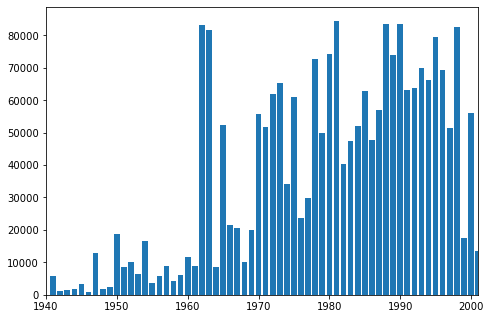

In [40]:
# Note it will take a while to excute
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(fordgobike.member_birth_year,fordgobike.duration_sec)
plt.xlim(1940,2001)
plt.show()

Clearly younger people renting more bikes(more duration) than older, but there is interesting peak in birth from 1960 to 1965.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The relations between weekdays and duration shows that sunday and saturday are the highest days in renting bikes.<br>
Also from user type and gender relations we knew that subscribers and males are renting more bike and more duaration.<br>



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I notice that member birth for 1962 and 1963 have the highest duration or highest number of renting bikes.

## Multivariate Exploration



From the previous section we can plot three or more variables to investigate our data even further.

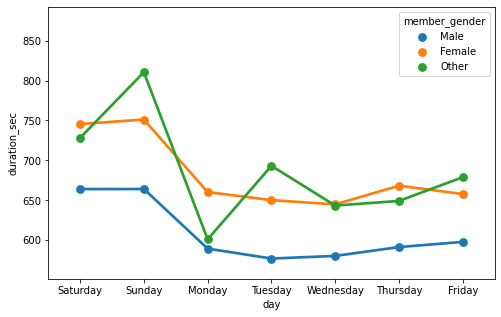

In [41]:
# Plot the 3 variables day, duration, gender
split_data = fordgobike[['day', 'hour','member_birth_year','member_gender','duration_sec']].query('duration_sec >= 104 & duration_sec <= 3176')
figure, axis = plt.subplots( sharey = True, figsize = (8, 5))
sb.pointplot(data = split_data, x = 'day', y = 'duration_sec', hue = 'member_gender', linestyles = '-', errwidth = 0);

<ul>
    <li> There is a similar pattern in the average duration second in males and females between weekdays.</li>
    <li> Females are clearly have average duration higher than males.</li>
    <li> Both of males and females have higher average duration in Saturday and Sunday.</li>
</ul>    

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Males and females shows much similarity in duration for using bikes over the weekdays.

### Were there any interesting or surprising interactions between features?

I was expecting males to have higher average duration in second than females but as we see the opposite happens.

In [43]:
# Save the new csv file
fordgobike.to_csv('new_fordgobike.csv', index=False)